# Scratchpad for *An introduction to Statistical Learning*

Book [homepage](http://www-bcf.usc.edu/~gareth/ISL/) and [downloadable pdf](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)

In [1]:
#install.packages(c("ISLR", "MASS"))

In [2]:
suppressMessages(library("sm"));
library("vioplot");
library("ISLR");
suppressMessages(library("MASS"));

Warning message:
“no DISPLAY variable so Tk is not available”

## Chapter 1

### Wage dataset

In [3]:
summary(Wage)

      year           age                     maritl           race     
 Min.   :2003   Min.   :18.00   1. Never Married: 648   1. White:2480  
 1st Qu.:2004   1st Qu.:33.75   2. Married      :2074   2. Black: 293  
 Median :2006   Median :42.00   3. Widowed      :  19   3. Asian: 190  
 Mean   :2006   Mean   :42.41   4. Divorced     : 204   4. Other:  37  
 3rd Qu.:2008   3rd Qu.:51.00   5. Separated    :  55                  
 Max.   :2009   Max.   :80.00                                          
                                                                       
              education                     region               jobclass   
 1. < HS Grad      :268   2. Middle Atlantic   :3000   1. Industrial :1544  
 2. HS Grad        :971   1. New England       :   0   2. Information:1456  
 3. Some College   :650   3. East North Central:   0                        
 4. College Grad   :685   4. West North Central:   0                        
 5. Advanced Degree:426   5. South Atla

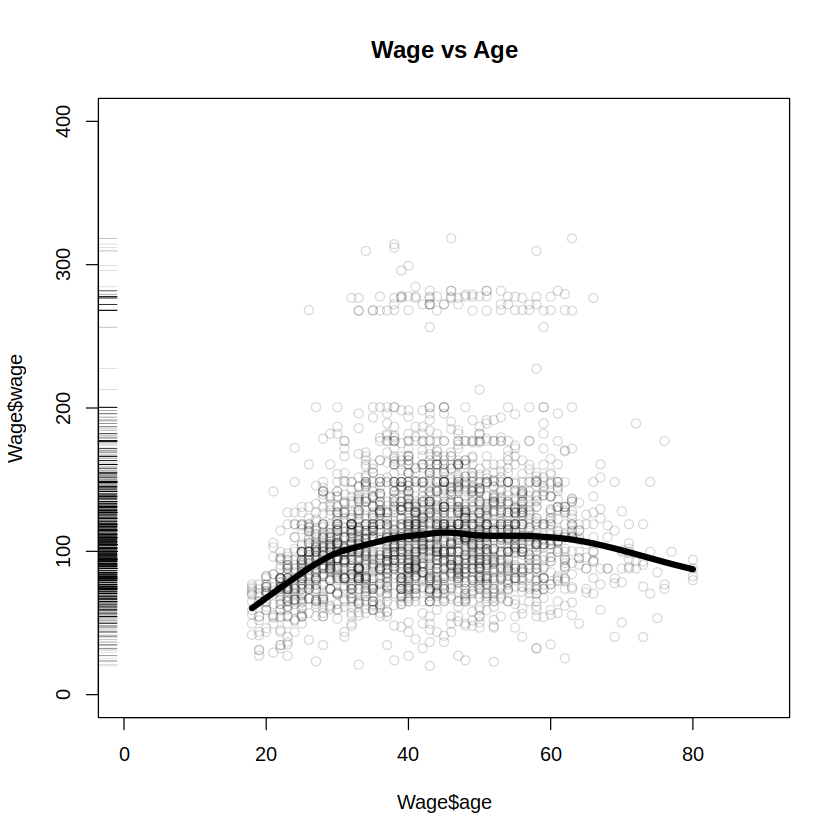

In [4]:
scatter.smooth(Wage$age, Wage$wage, span=0.3, col=rgb(0,0,0,0.15), lpars=list(lwd=5), ylim=c(0,400), xlim=c(0,90)); rug(Wage$wage,side=2, col=rgb(0,0,0,.2));
title("Wage vs Age")

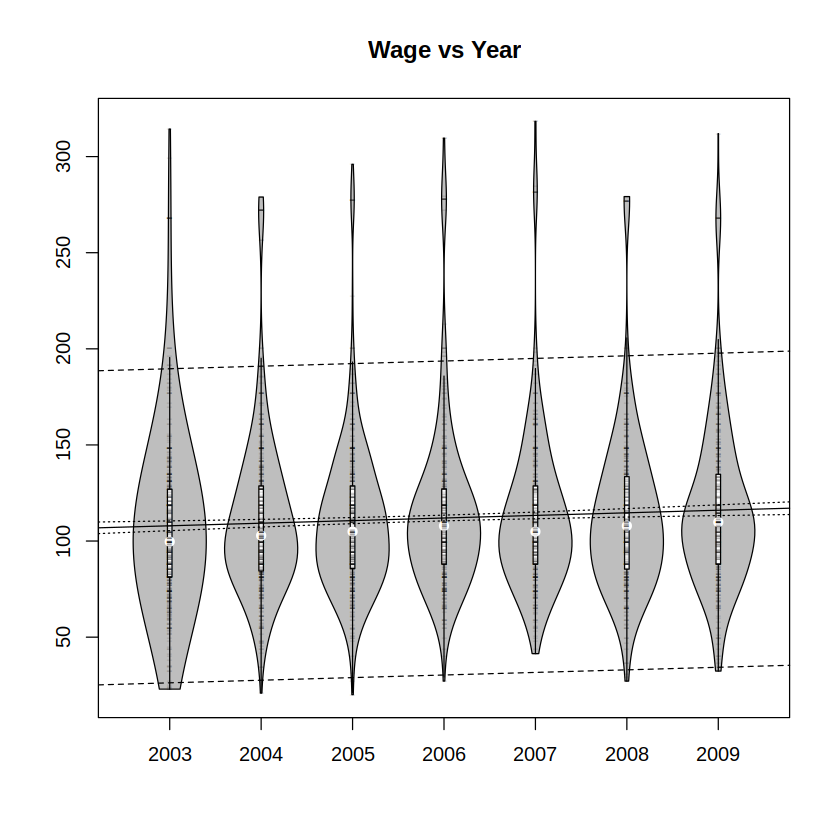

In [5]:
# violin plot
l <- by(Wage$wage, Wage$year, function(x) {x});
do.call((function (...) { vioplot(..., names=names(l), col="gray", rectCol="white") }), unname(l));
points(wage ~ as.factor(year), Wage, pch='-', col=rgb(0,0,0,0.1));
title("Wage vs Year")

# linear model with confidence interval
fyear <- as.numeric(as.factor(Wage$year)); # rescale year to match violin plot x-axis
m <- lm(wage ~ fyear, Wage);
xvals <- seq(par("usr")[1], par("usr")[2], length=100);
p <- predict(m, data.frame(fyear=xvals), interval="confidence", level=0.95);
lines(xvals,p[,"lwr"], lty="dotted");
lines(xvals,p[,"upr"], lty="dotted");
lines(xvals,p[,"fit"]);

# prediction intervals for linear model
p <- predict(m, data.frame(fyear=xvals), interval="prediction", level=0.95);
lines(xvals,p[,"lwr"], lty="dashed");
lines(xvals,p[,"upr"], lty="dashed");

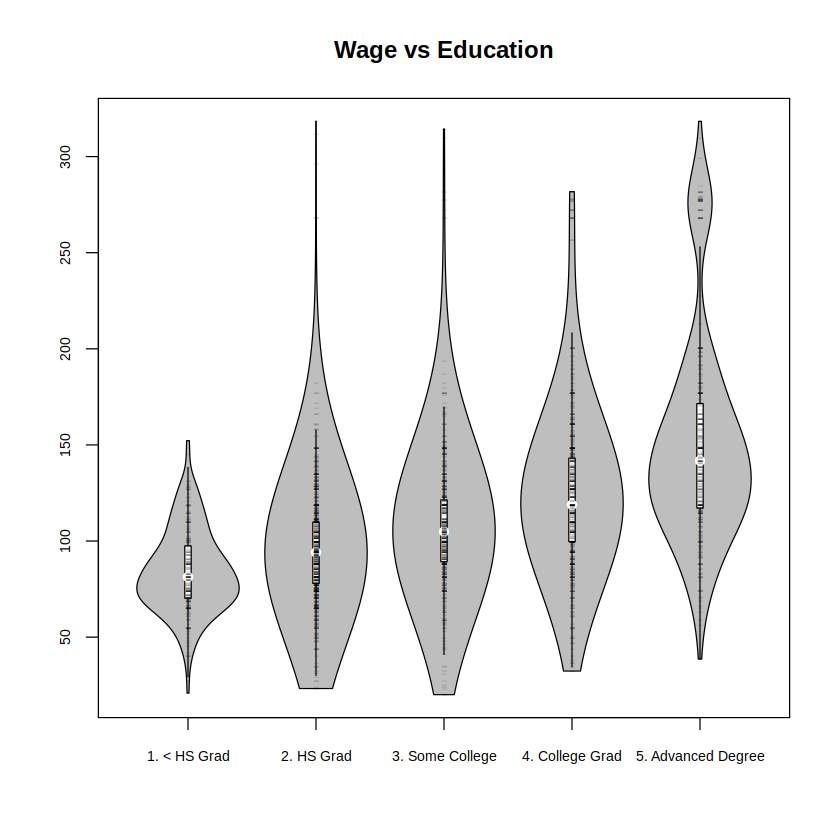

In [6]:

l = by(Wage$wage, Wage$education, function(x) {x});
par(cex.axis=0.70)
do.call((function (...) { vioplot(..., names=names(l), col="gray", rectCol="white") }), unname(l));
points(wage ~ as.factor(education), Wage, pch='-', col=rgb(0,0,0,0.1))
title("Wage vs Education")

### Smarket Dataset

In [7]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

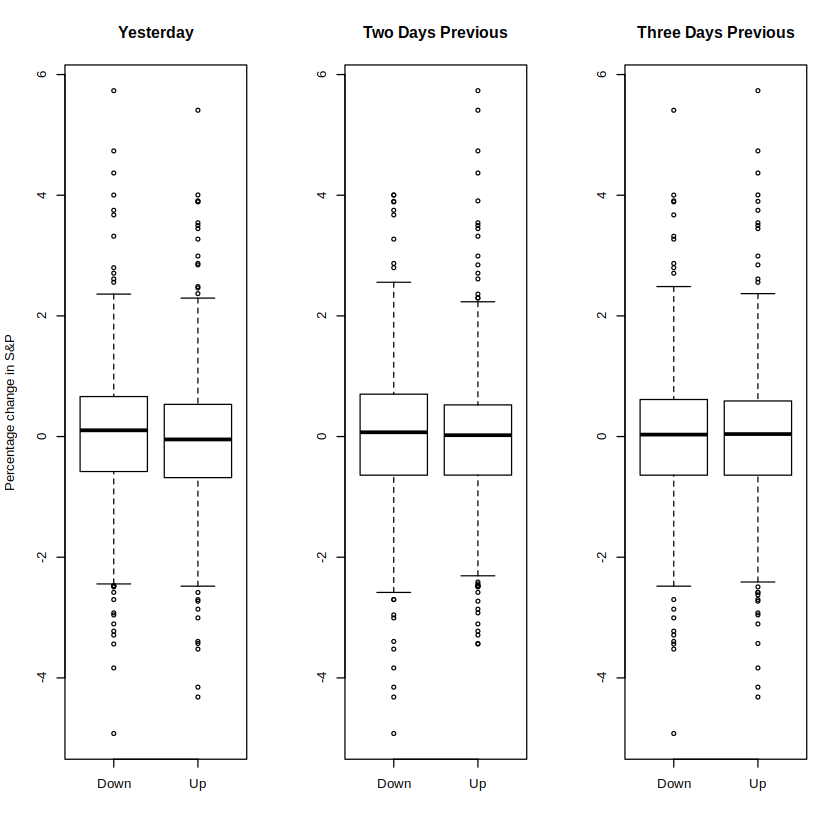

In [8]:
par(mfcol=c(1,3))
boxplot(Lag1 ~ Direction, Smarket, ylab="Percentage change in S&P"); title("Yesterday");
boxplot(Lag2 ~ Direction, Smarket); title("Two Days Previous");
boxplot(Lag3 ~ Direction, Smarket); title("Three Days Previous");

### NCI60 dataset

In [9]:
summary(NCI60)

     Length Class  Mode     
data 437120 -none- numeric  
labs     64 -none- character

In [10]:
pca<-prcomp(t(NCI60$data), scale=T, center=T)

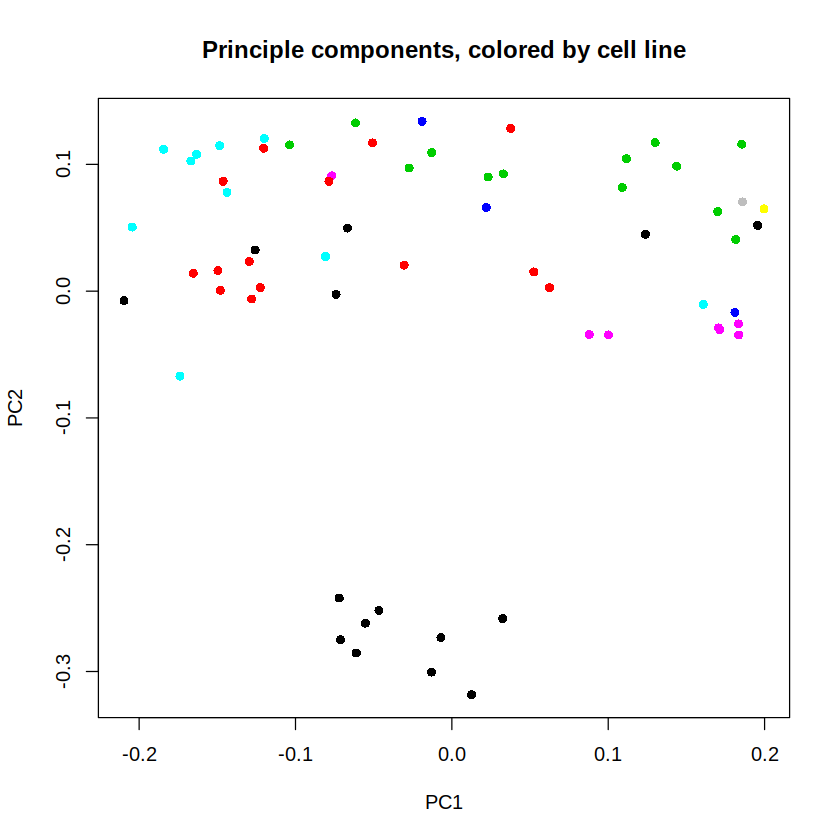

In [11]:
plot(pca$rotation[,1:2], col=as.factor(NCI60$labs), pch=16, main="Principle components, colored by cell line")

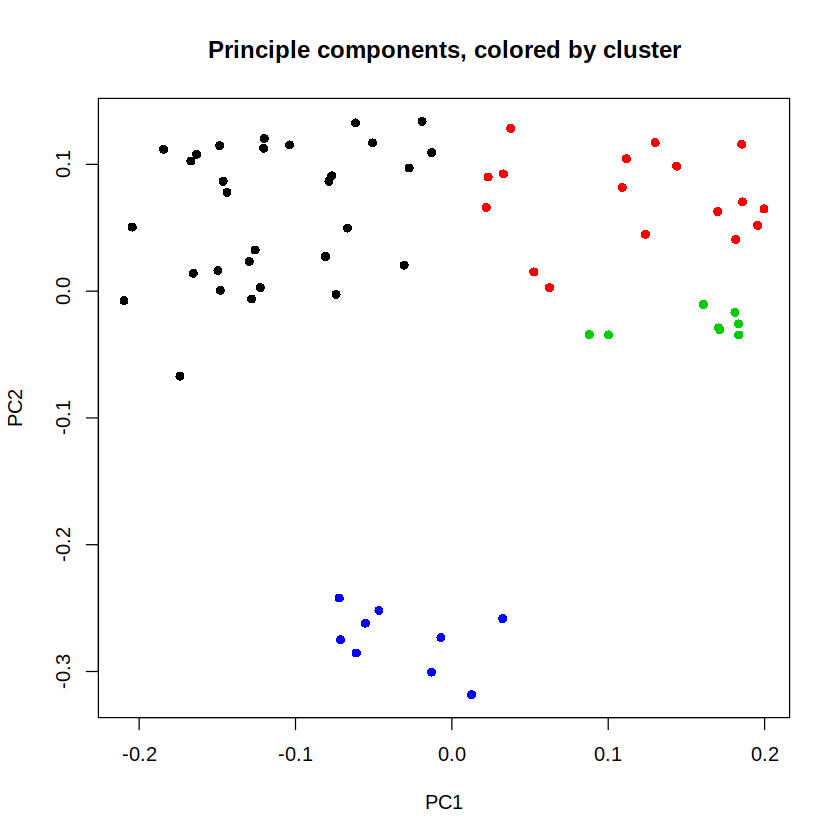

In [12]:
set.seed(20180403) # kmeans clustering uses a random number, so let's ensure reproducability
k <- kmeans(NCI60$data, 4, nstart=4)
plot(pca$rotation[,1:2], col=k$cluster, pch=16, main=("Principle components, colored by cluster"))

## Chapter 2

### lab

In [13]:
matrix(1:15, 3, 5)

1,4,7,10,13
2,5,8,11,14
3,6,9,12,15


In [14]:
matrix(1:15, 3, 5, byrow=T)

1,2,3,4,5
6,7,8,9,10
11,12,13,14,15


In [15]:
seq(-1,1,length=7)

[1] -1.0000000 -0.6666667 -0.3333333  0.0000000  0.3333333  0.6666667  1.0000000

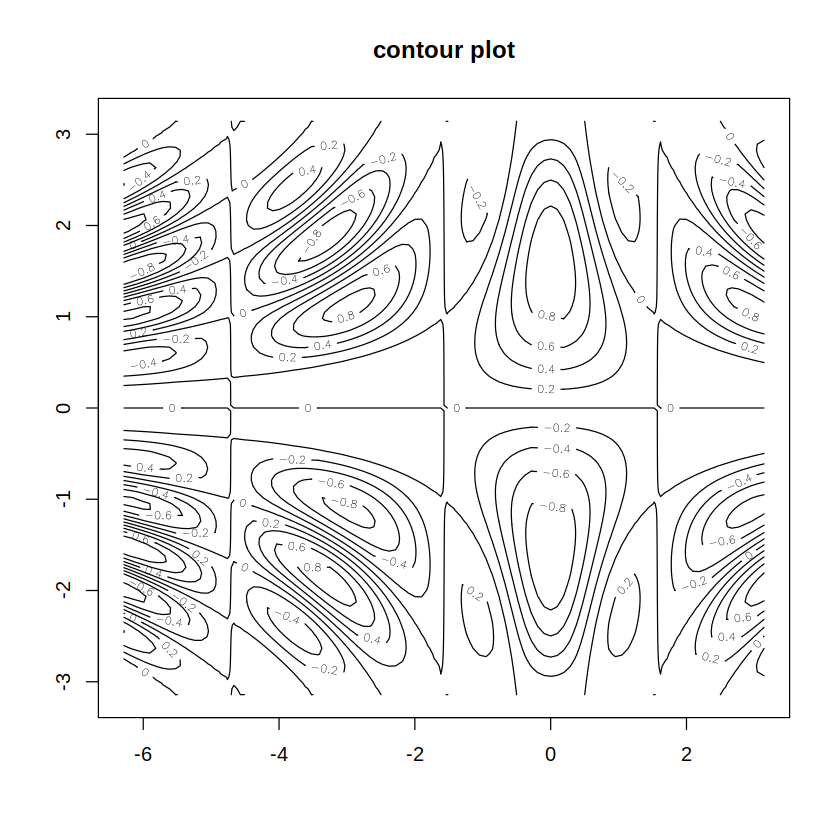

In [32]:
x<-seq(-2*pi, pi, length=100);
y<-seq(-pi, pi, length=100);
contour(x, y, outer(x, y, function(x, y) cos(x)*sin(y)*cos(x*y)), main="contour plot");

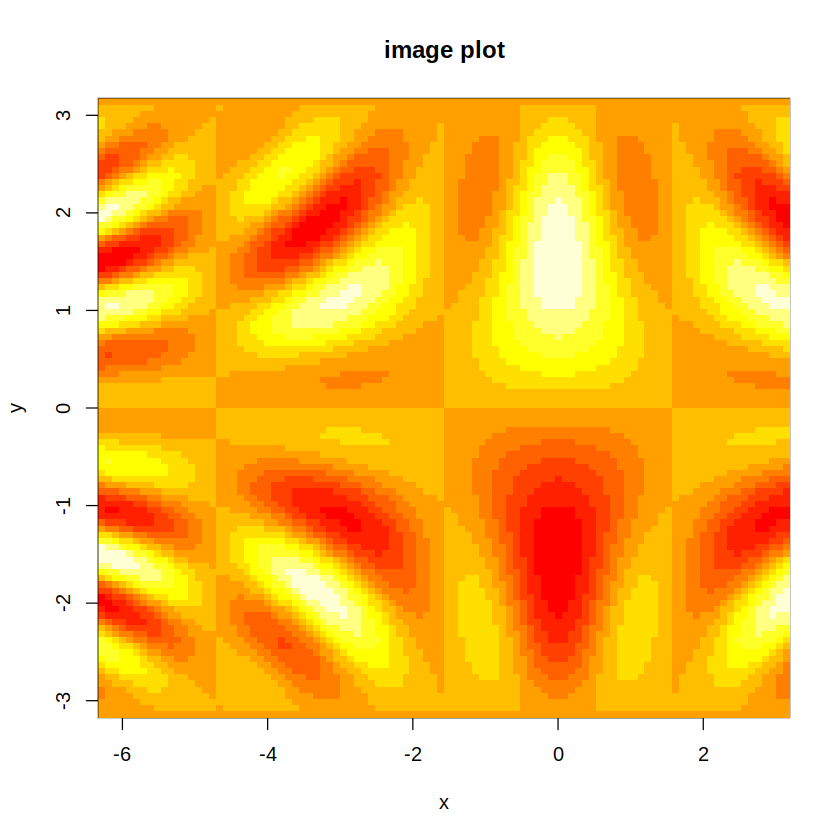

In [33]:
image(x, y, outer(x, y, function(x, y) cos(x)*sin(y)*cos(x*y))); title("image plot");

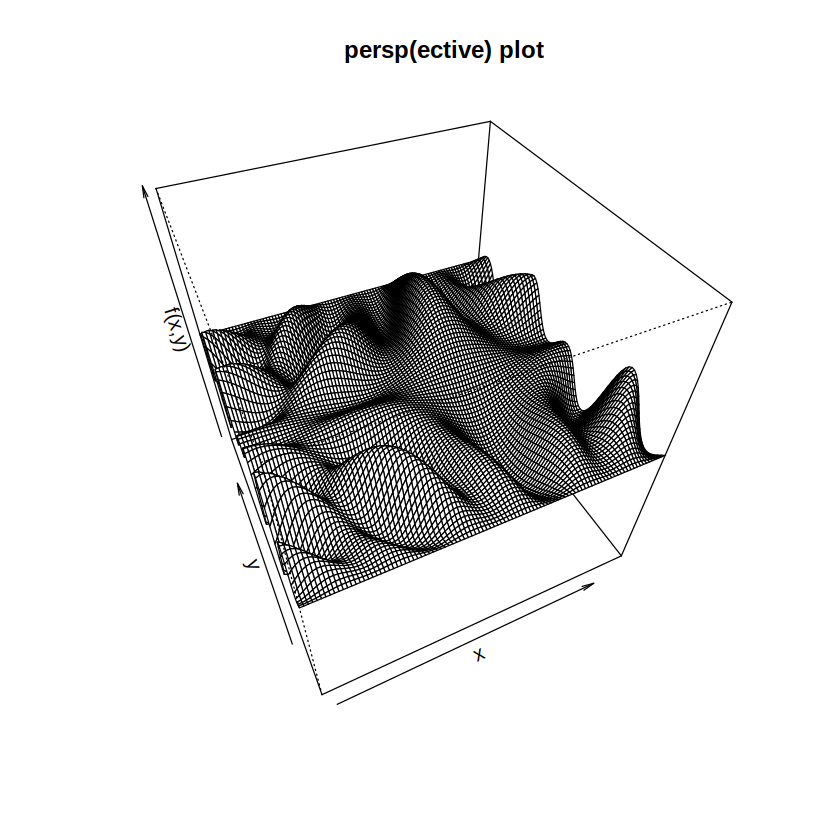

In [35]:
persp(x, y, outer(x, y, function(x, y) cos(x)*sin(y)*cos(x*y)), theta=-25, phi=45, zlim=c(-3, 3), 
                  zlab="f(x,y)", main="persp(ective) plot");

In [17]:
matrix(1:15, 3, 5)[-2,]

1,4,7,10,13
3,6,9,12,15


In [18]:
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

In [19]:
names(Auto)

[1] "mpg"          "cylinders"    "displacement" "horsepower"   "weight"      
[6] "acceleration" "year"         "origin"       "name"

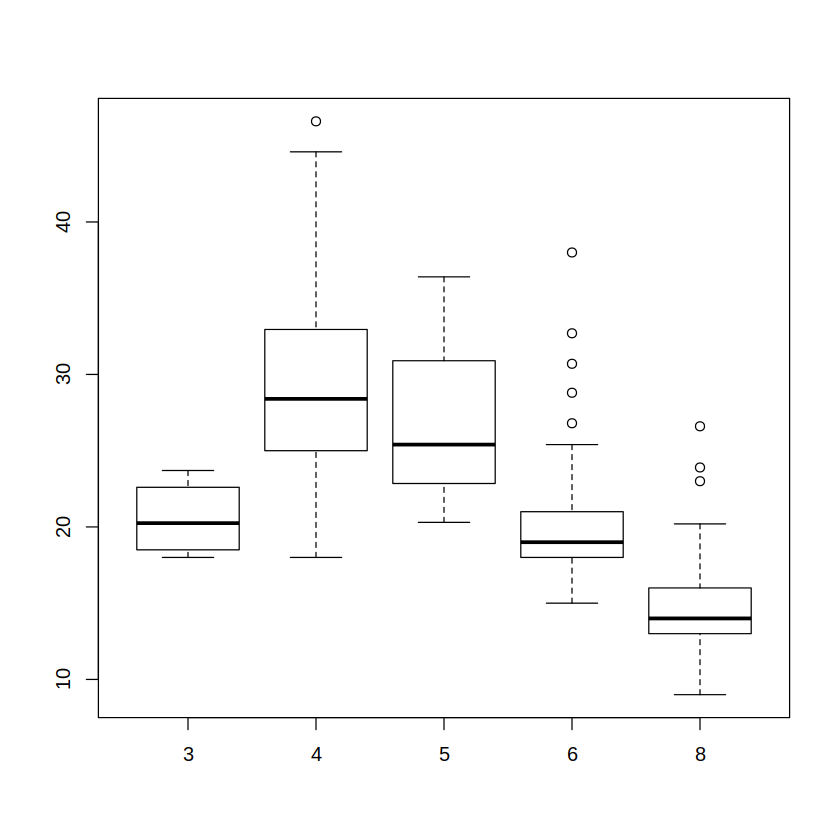

In [20]:
plot(as.factor(Auto$cylinders), Auto$mpg)

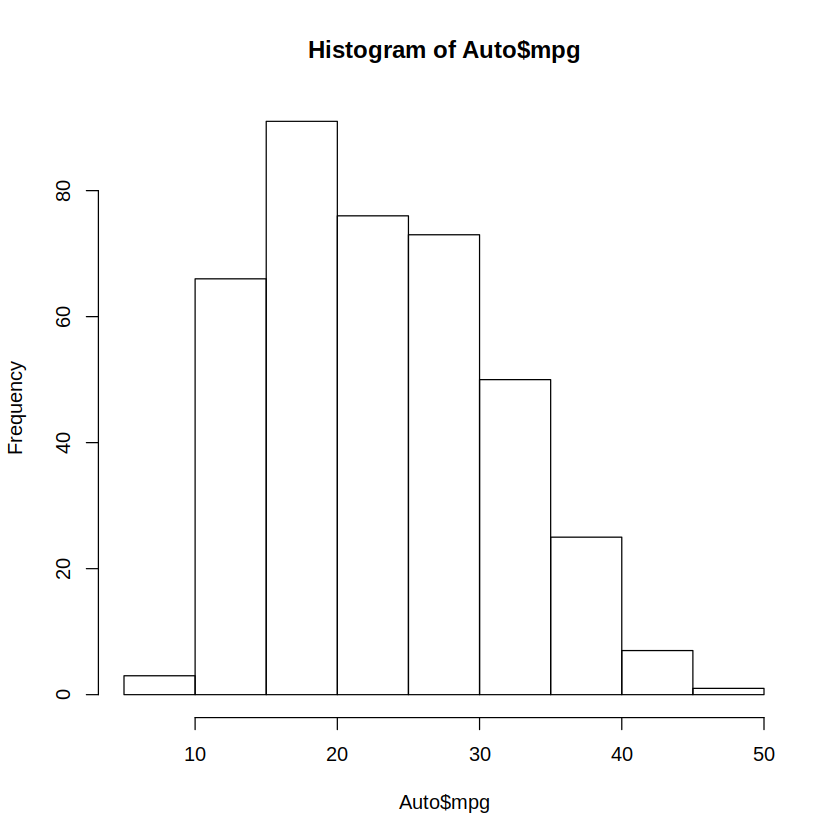

In [21]:
hist(Auto$mpg)

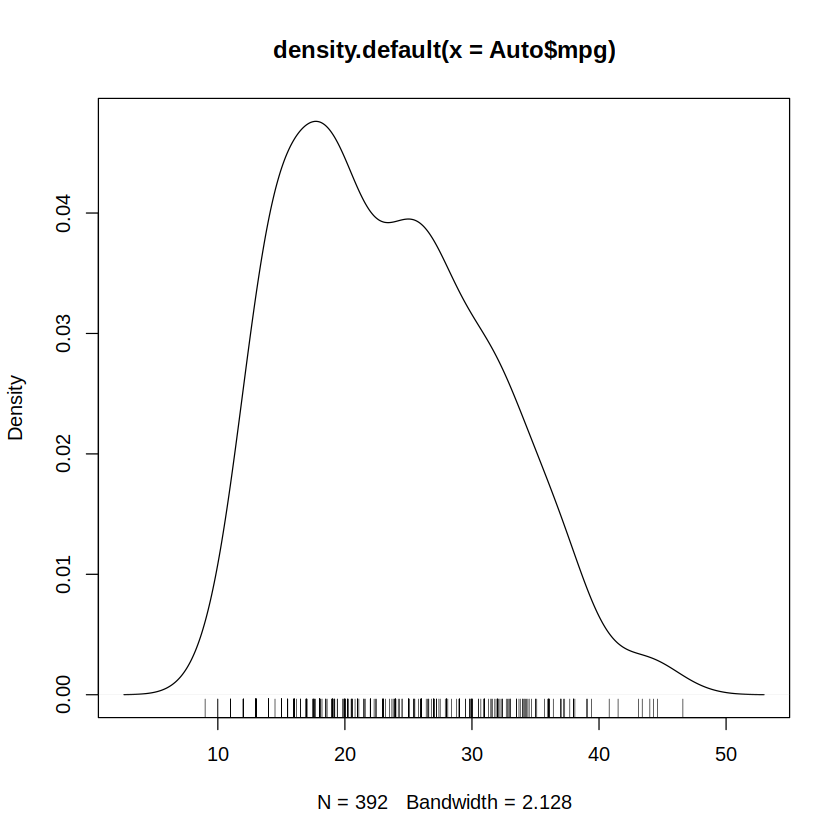

In [22]:
plot(density(Auto$mpg)); rug(Auto$mpg)

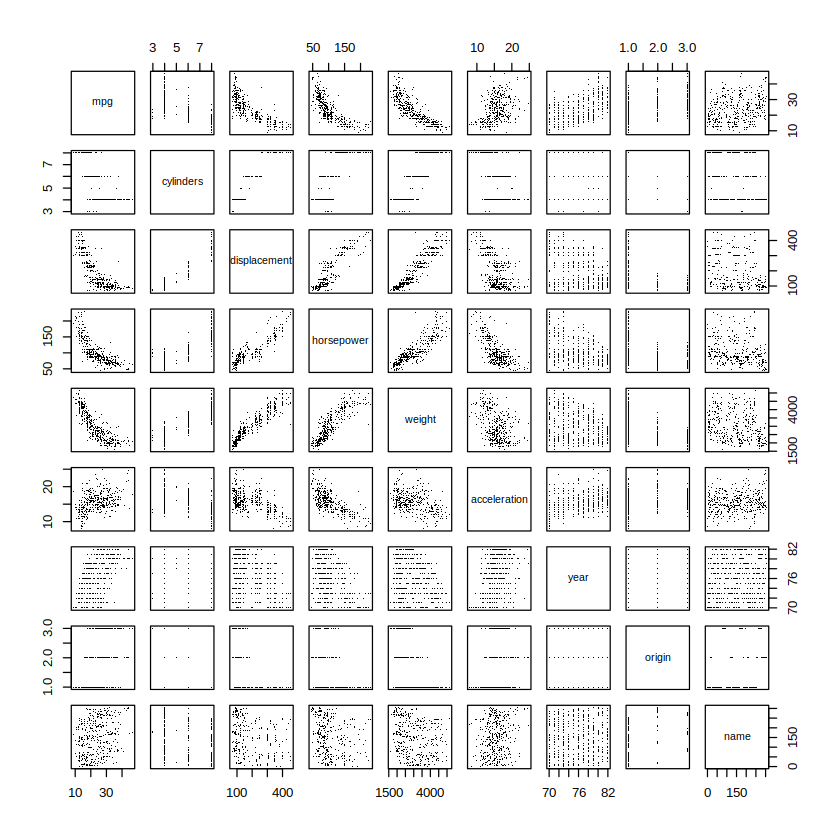

In [23]:
pairs(Auto, pch=".")

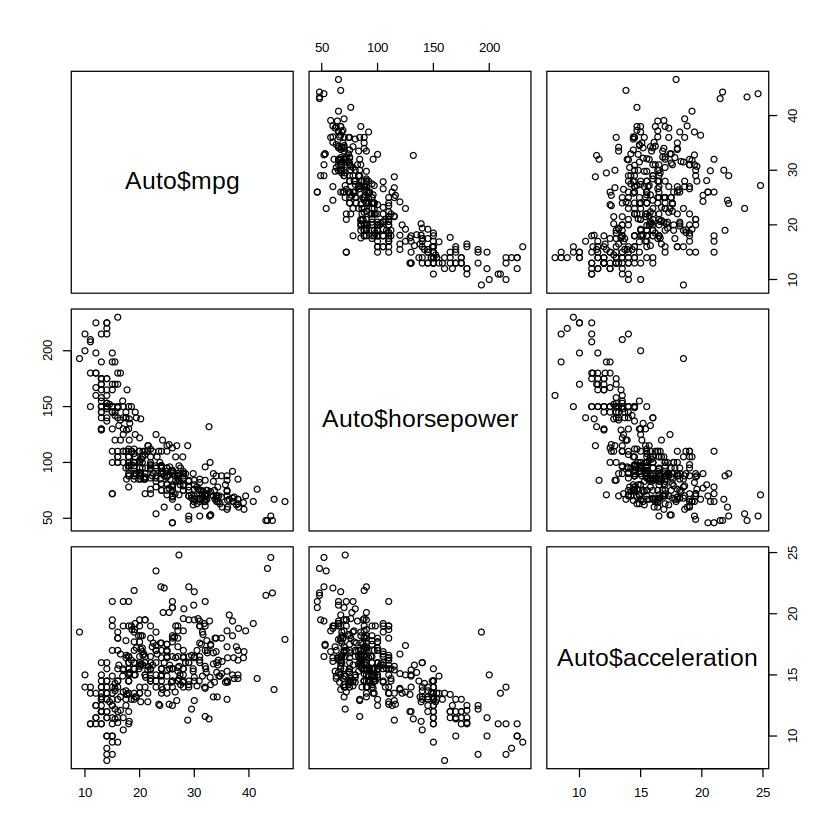

In [24]:
pairs(~ Auto$mpg + Auto$horsepower + Auto$acceleration)


Call:
lm(formula = mpg ~ year, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.0212  -5.4411  -0.4412   4.9739  18.2088 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -70.01167    6.64516  -10.54   <2e-16 ***
year          1.23004    0.08736   14.08   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.363 on 390 degrees of freedom
Multiple R-squared:  0.337,	Adjusted R-squared:  0.3353 
F-statistic: 198.3 on 1 and 390 DF,  p-value: < 2.2e-16


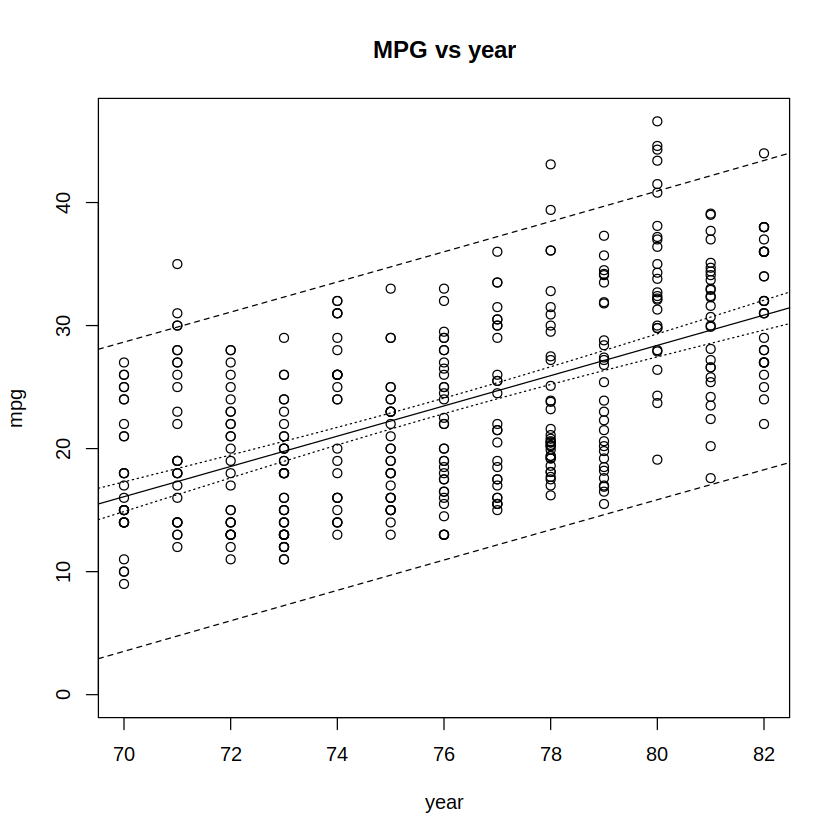

In [25]:
m <- lm(mpg ~ year, Auto);
summary(m);
plot(mpg ~ year, Auto, main = "MPG vs year", ylim=c(0,max(Auto$mpg)));

xvals <- seq(par("usr")[1], par("usr")[2], length=100);
p <- predict(m, data.frame(year=xvals), interval="confidence", level=0.95);
lines(xvals,p[,"lwr"], lty="dotted");
lines(xvals,p[,"upr"], lty="dotted");
lines(xvals,p[,"fit"]);

# prediction intervals for linear model
p <- predict(m, data.frame(year=xvals), interval="prediction", level=0.95);
lines(xvals,p[,"lwr"], lty="dashed");
lines(xvals,p[,"upr"], lty="dashed");

### Exercises

#### 8

In [26]:
summary(College)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

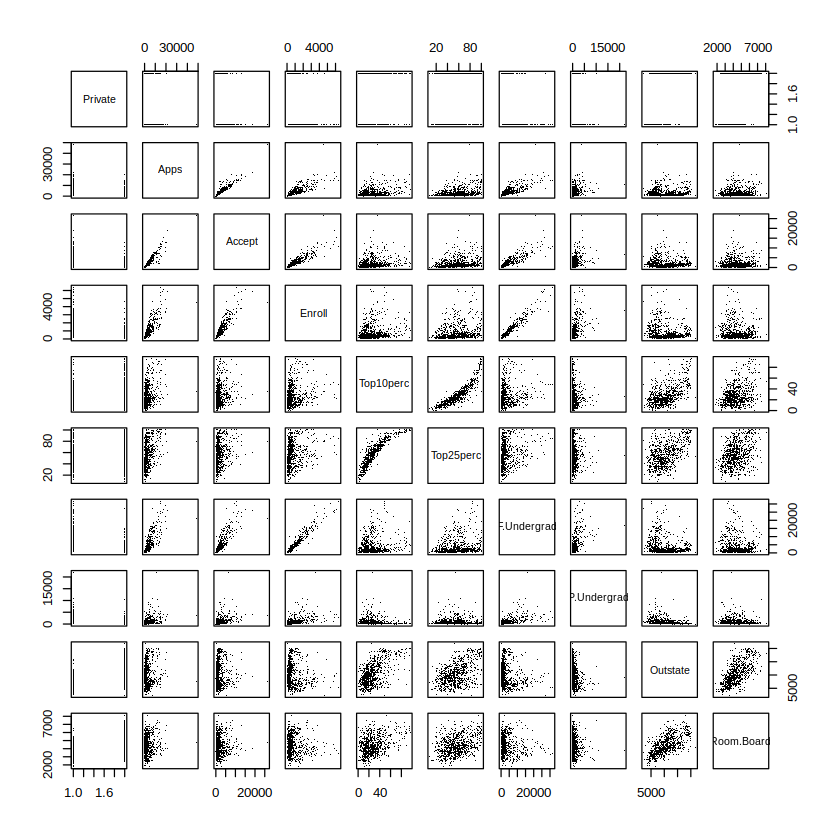

In [27]:
pairs(College[,1:10], pch=".")

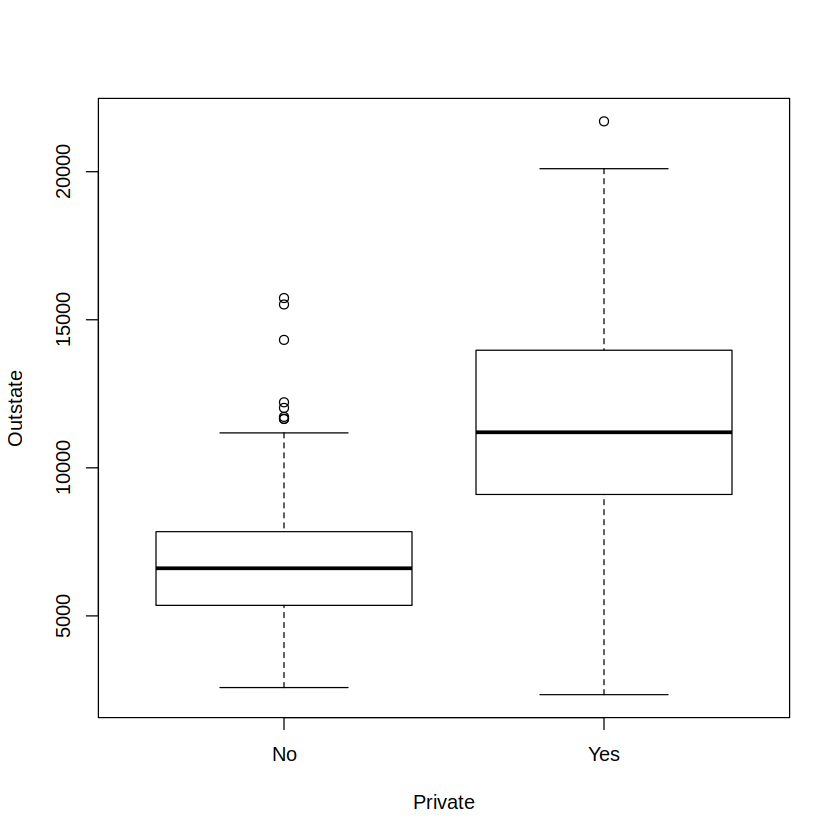

In [28]:
plot(Outstate ~ Private, College)

   Mode   FALSE    TRUE 
logical     699      78 

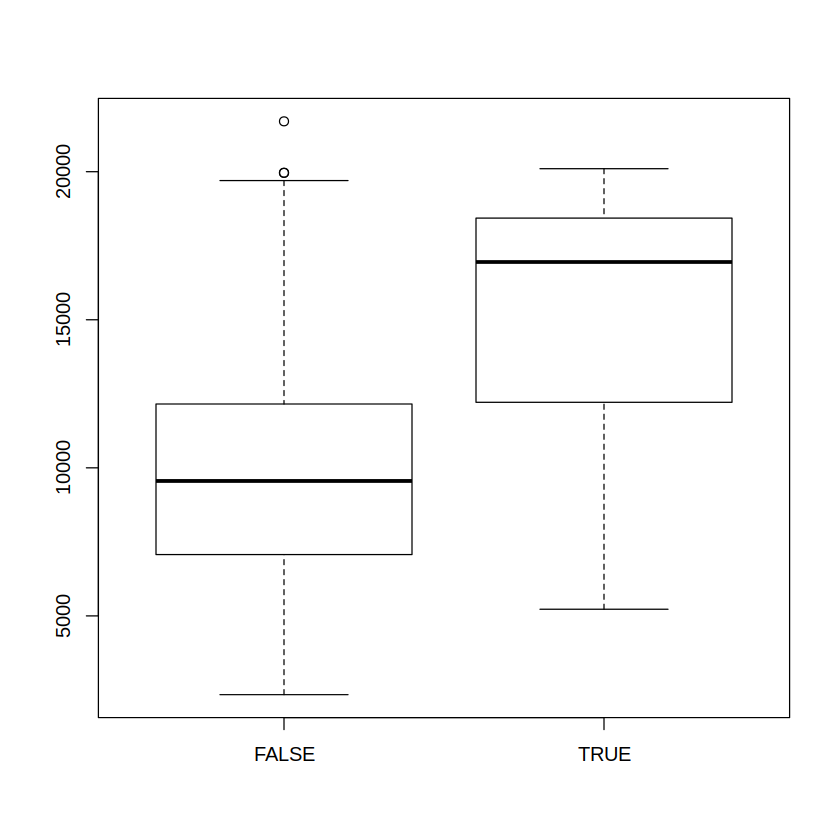

In [29]:
Elite = College$Top10perc > 50;
college = data.frame(College, Elite);
summary(college$Elite);
boxplot(Outstate ~ Elite, college)

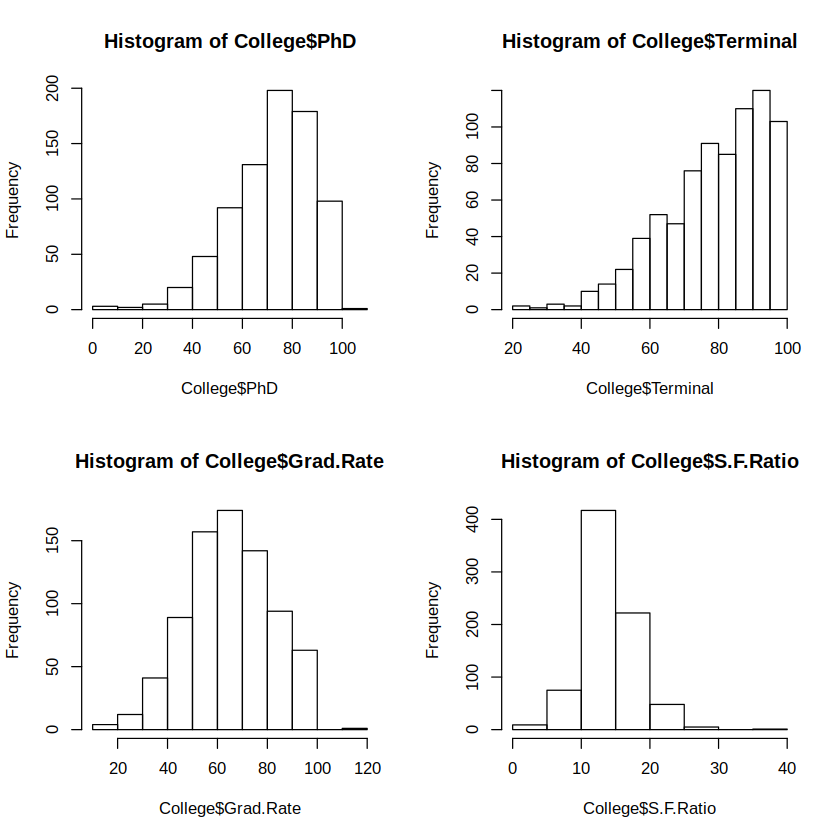

In [30]:
par(mfrow=c(2,2));
hist(College$PhD);
hist(College$Terminal);
hist(College$Grad.Rate);
hist(College$S.F.Ratio);

### 9

In [61]:
ncols = dim(Auto)[2]
sapply(1:(ncols), 
       function (i) {
           if (is.numeric(Auto[1,i])) {
               c(colnames(Auto)[i], range(Auto[,i])) 
           } else {
               c(colnames(Auto)[i], "not numeric", "") 
           }
       }
      )

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
9,3,68,46,1613,8,70,1,not numeric
46.6,8,455,230,5140,24.8,82,3,


### 10

In [67]:
?Boston

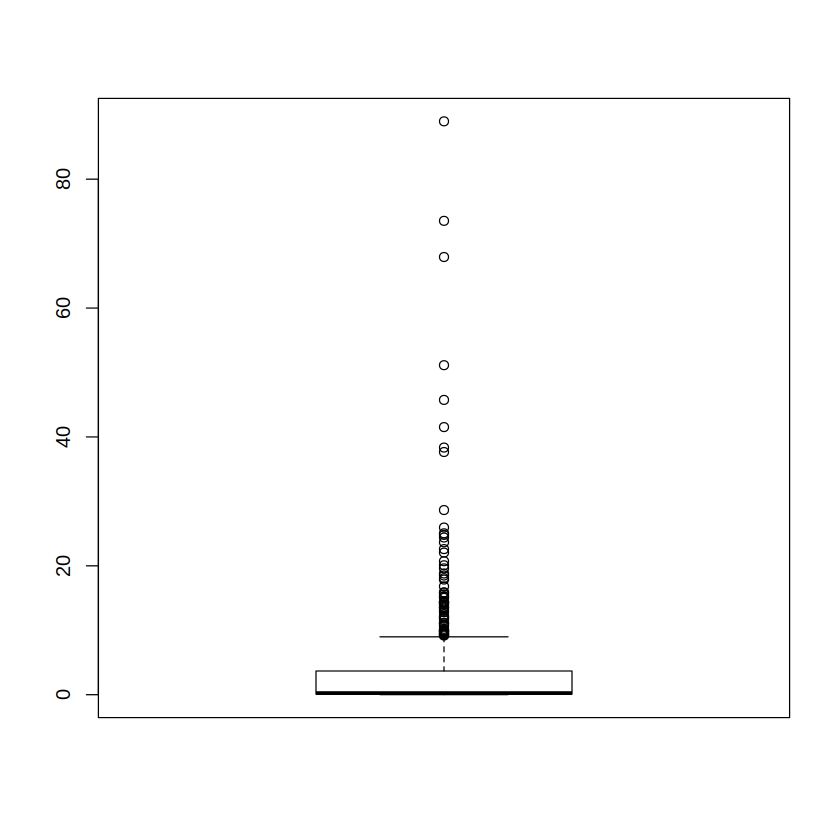

In [70]:
boxplot(Boston$crim)

In [66]:
sum(Boston$chas)

[1] 35

## Chapter 3

### Lab

In [78]:
m = lm(medv ~ lstat, Boston);
summary(m)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [80]:
names(m)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [81]:
coef(m)

(Intercept)       lstat 
 34.5538409  -0.9500494

In [82]:
confint(m)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [85]:
predict(m, data.frame(lstat=c(1,6,12)), interval="confidence")

,fit,lwr,upr
1,33.60379,32.56402,34.64356
2,28.85354,28.11121,29.59588
3,23.15325,22.60809,23.69841


In [86]:
predict(m, data.frame(lstat=c(1,6,12)), interval="prediction")

,fit,lwr,upr
1,33.60379,21.34761,45.85997
2,28.85354,16.61901,41.08808
3,23.15325,10.92909,35.37740


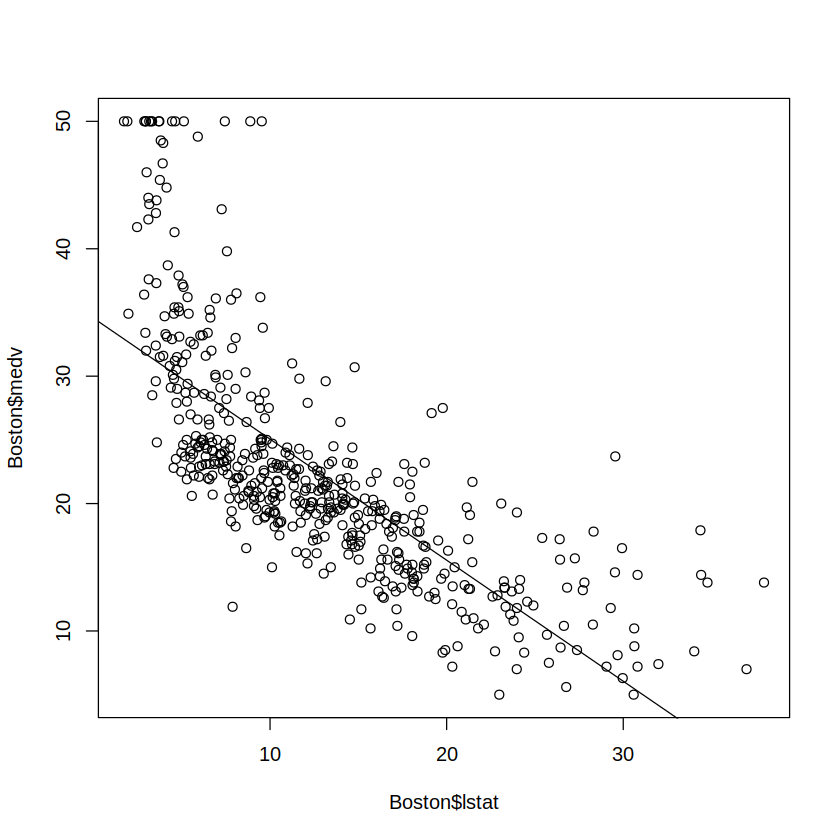

In [89]:
plot(Boston$lstat, Boston$medv);
abline(m)

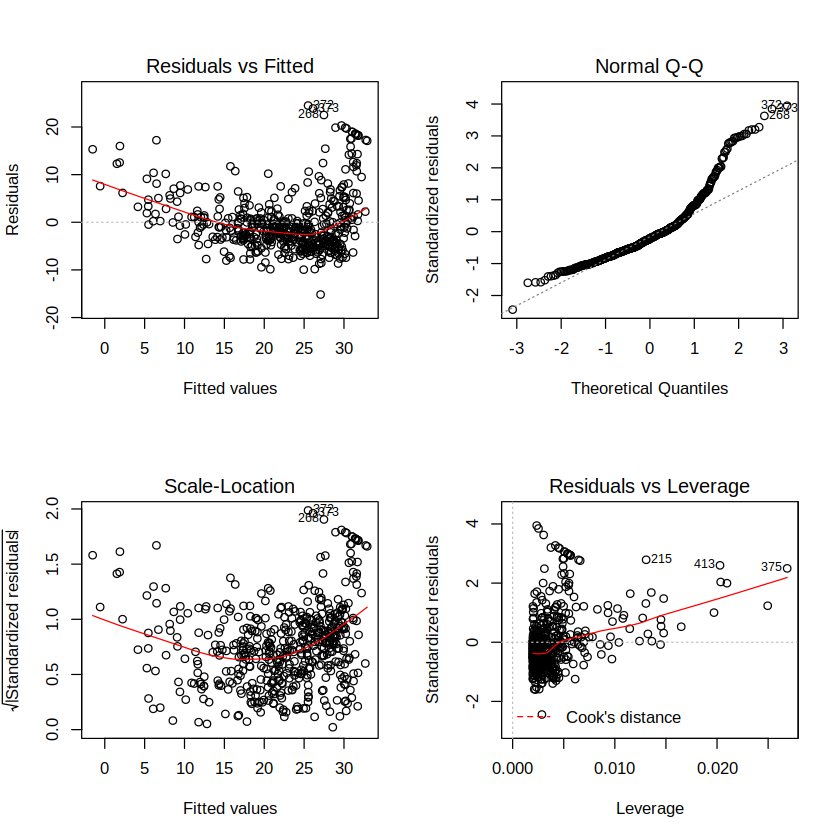

In [90]:
par(mfrow=c(2,2));
plot(m)

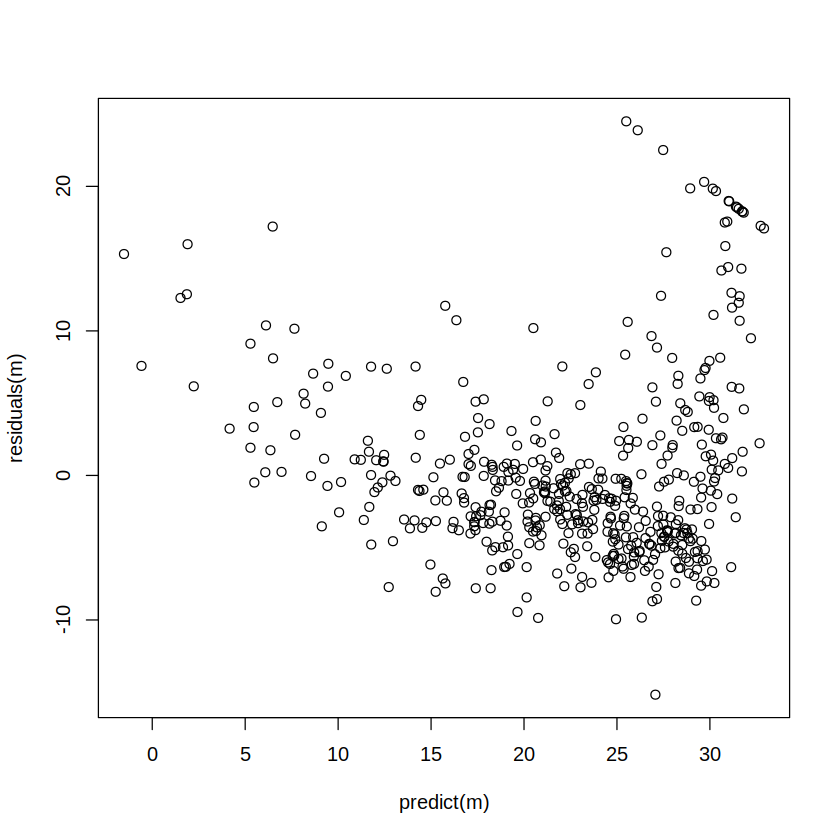

In [91]:
plot(predict(m), residuals(m))

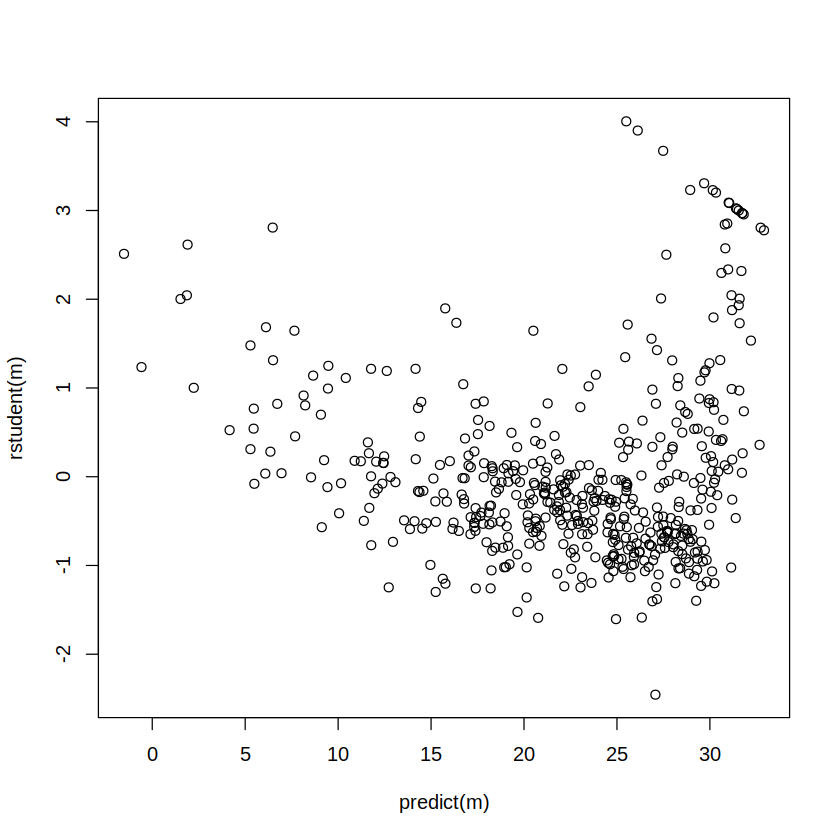

In [92]:
plot(predict(m), rstudent(m))

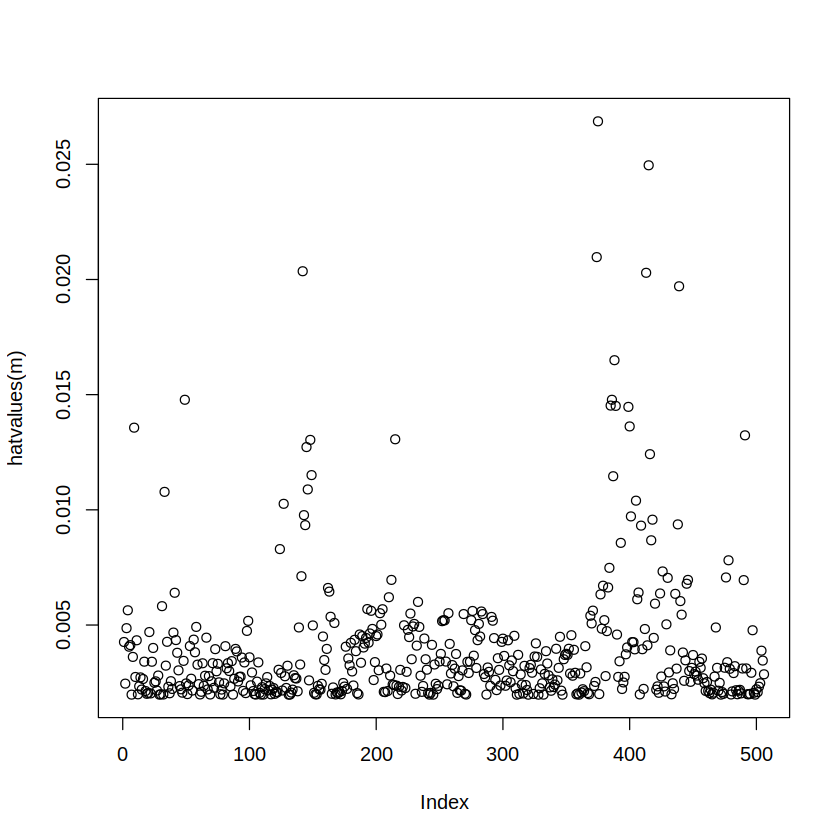

In [93]:
plot(hatvalues(m))

In [96]:
which.max(hatvalues(m))

375 
375

In [98]:
m <- lm(medv ~ lstat + age, Boston);
summary(m)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [99]:
m <- lm(medv ~ ., Boston);
summary(m)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [101]:
m <- lm(medv ~ .-age, Boston);
summary(m)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

In [103]:
m1 = update(m, ~.-indus);
summary(m1)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*

In [104]:
summary(lm(medv~lstat*age, Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


In [106]:
summary(lm(medv ~ lstat + I(lstat^2), Boston))


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


In [108]:
m1 = lm(medv ~ lstat, Boston);
m2 = lm(medv ~ lstat + I(lstat^2), Boston);
anova(m1, m2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


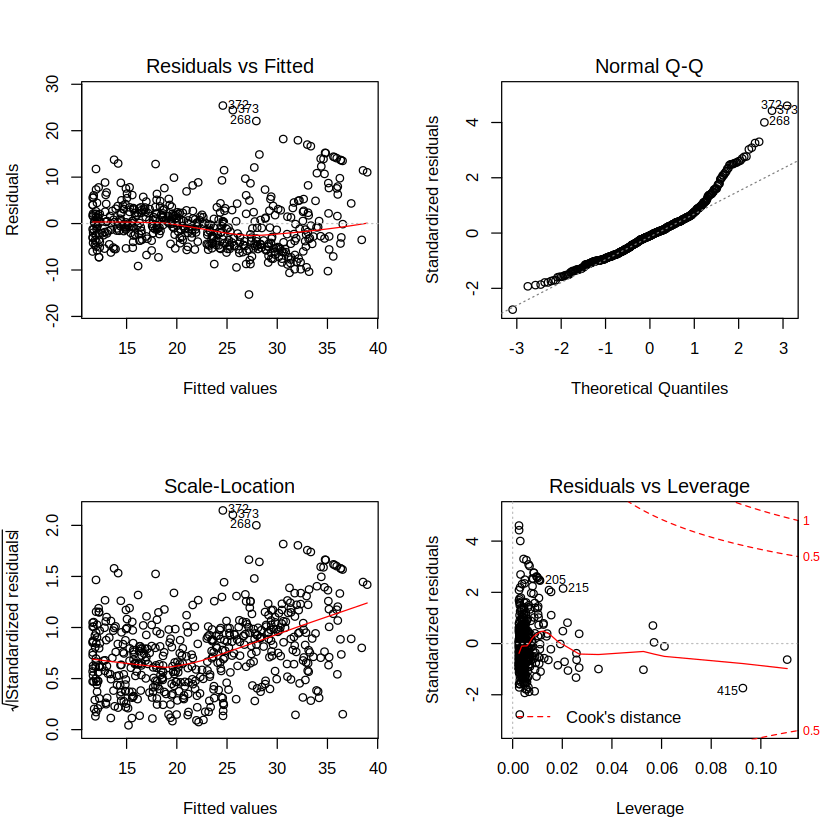

In [109]:
par(mfrow=c(2,2));
plot(m2)

In [110]:
m5 = lm(medv ~ poly(lstat,5), Boston);
summary(m5)


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


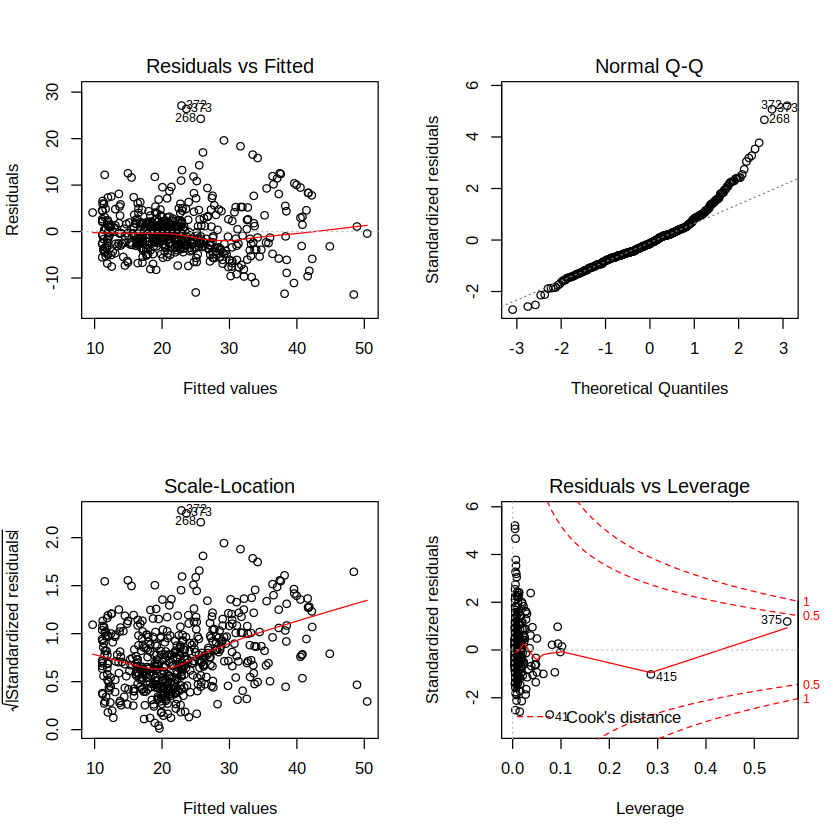

In [111]:
par(mfrow=c(2,2));
plot(m5)

In [113]:
summary(lm(medv ~ log(lstat), Boston))


Call:
lm(formula = medv ~ log(lstat), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4599  -3.5006  -0.6686   2.1688  26.0129 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  52.1248     0.9652   54.00   <2e-16 ***
log(lstat)  -12.4810     0.3946  -31.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.329 on 504 degrees of freedom
Multiple R-squared:  0.6649,	Adjusted R-squared:  0.6643 
F-statistic:  1000 on 1 and 504 DF,  p-value: < 2.2e-16
